In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import pickle

# 1. Import and warehouse data: 

In [2]:
TC_df_1=pd.read_csv('TelcomCustomer-Churn.csv')
TC_df_2=pd.read_csv('TelcomCustomer-Churn_1.csv')
TC_df_3=pd.read_csv('TelcomCustomer-Churn_2.csv')

In [3]:
print("TC_df_1 Shape:",TC_df_1.shape)
TC_df_1.head()

TC_df_1 Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
print("TC_df_2 Shape:",TC_df_2.shape)
TC_df_2.head()

TC_df_2 Shape: (7043, 10)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [5]:
print("TC_df_3 Shape:",TC_df_3.shape)
TC_df_3.head()

TC_df_3 Shape: (7043, 11)


,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
TC_df_temp=pd.concat([TC_df_2, TC_df_3], axis=1)
TC_df_temp.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
TC_df=TC_df_1.merge(TC_df_temp,how='outer',left_index=False )

In [8]:
TC_df_temp.shape

(7043, 21)

# 2. Data cleansing:

In [9]:
#• Missing value treatment
TC_df.isnull().sum()
#there is not null value in the data so data is clean upto this step

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
TC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
TC_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
TC_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


We can see custome id is unique. This feature does not contribute for this analysis, therefore we are going to drop the column.

In [13]:
TC_df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [14]:
#dropping the customer id 
TC_df_clean = TC_df.drop('customerID', axis=1)


In [15]:
#These values are empty in Total Charges 
TC_df[TC_df['TotalCharges'].str.contains(" ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [16]:
TC_df_temp=TC_df[~TC_df['TotalCharges'].str.contains(" ")]

In [17]:
TC_df_temp['TotalCharges']=TC_df_temp['TotalCharges'].apply(pd.to_numeric)


<ipython-input-17-c0edfd54ecea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TC_df_temp['TotalCharges']=TC_df_temp['TotalCharges'].apply(pd.to_numeric)


In [18]:
TC_df_temp.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
#apply the missing value with mean of TotalCharges
TC_df_clean['TotalCharges'] = TC_df['TotalCharges'].replace(" ",TC_df_temp.TotalCharges.median())

In [20]:
TC_df_clean['TotalCharges']=TC_df_clean['TotalCharges'].apply(pd.to_numeric)

In [21]:
TC_df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


# 3. Data analysis & visualisation: 

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

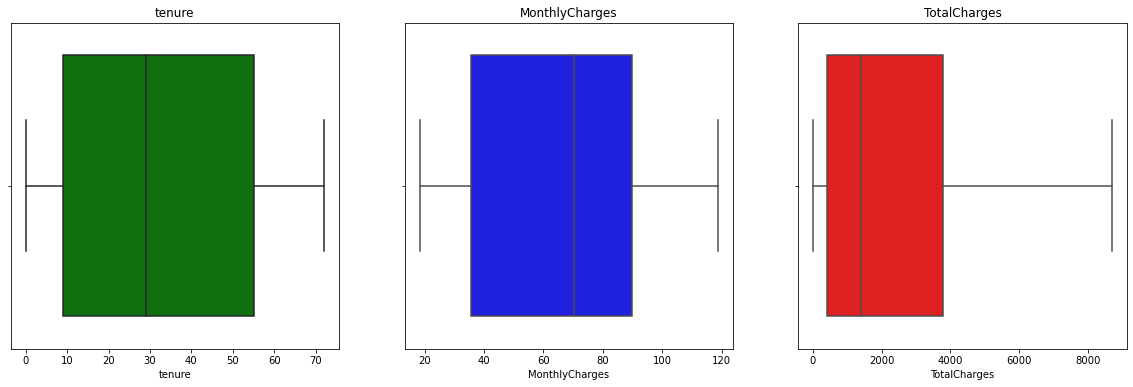

In [22]:

#univarient Analysis for the data

plt.figure(figsize=(20,6))

# #boxplot
plt.subplot(1, 3, 1)
plt.title('tenure')
sns.boxplot(TC_df_clean['tenure'],orient='vertical',color='green')

plt.subplot(1,3,2)
plt.title('MonthlyCharges')
sns.boxplot(TC_df_clean['MonthlyCharges'],orient='vertical',color='blue')

plt.subplot(1,3,3)
plt.title('TotalCharges')
sns.boxplot(TC_df_clean['TotalCharges'],orient='vertical',color='red')

plt.show()

C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:title={'center':'TotalCharges'}, xlabel='TotalCharges', ylabel='Density'>

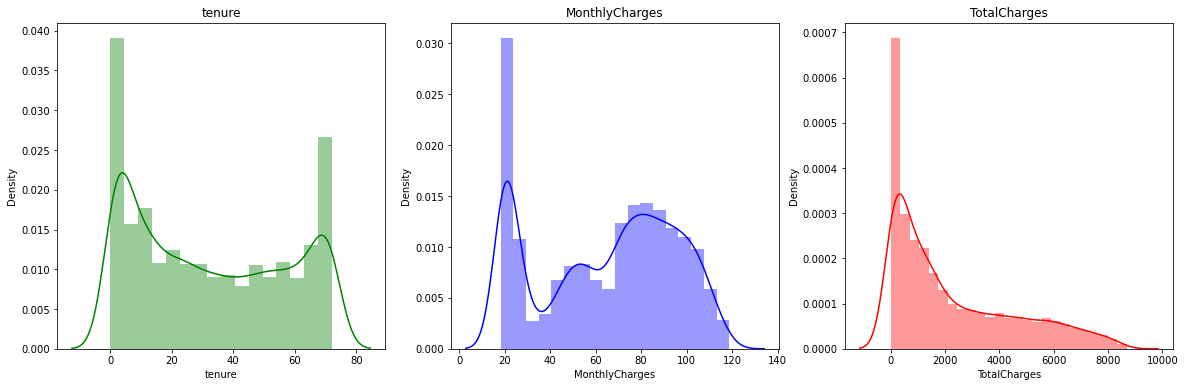

In [23]:
plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('tenure')
sns.distplot(TC_df_clean['tenure'],color='green')

plt.subplot(1,3,2)
plt.title('MonthlyCharges')
sns.distplot(TC_df_clean['MonthlyCharges'],color='blue')

plt.subplot(1,3,3)
plt.title('TotalCharges')
sns.distplot(TC_df_clean['TotalCharges'],color='red')

In [24]:
#We see largest cutomer are in starting and Ending of the tenure .
#In Initial Month of subcription there is heavy usage and after that it is getting normalized for the Monthly and Total Charges
TC_df_clean.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


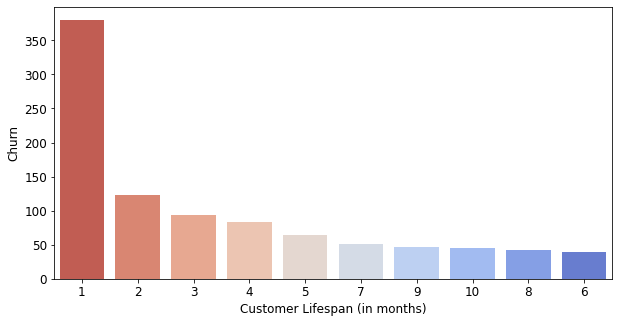

In [25]:
p = sns.color_palette("coolwarm", 10)
p.reverse()

TC_df_top_churn = pd.DataFrame(TC_df_clean[TC_df_clean['Churn'] == 'Yes']['tenure'].value_counts().sort_values(ascending=False))
TC_total_churn = TC_df_clean[TC_df_clean['Churn'] == 'Yes'].shape[0]

fig, ax = plt.subplots(figsize=(10,5))
sns_lifespan = sns.barplot( x = TC_df_top_churn[:10].index, y = TC_df_top_churn[:10].tenure, ax=ax, palette=p, order=TC_df_top_churn[:10].index)
plt.xticks(size=12)
plt.xlabel('Customer Lifespan (in months)', size=12)
plt.yticks(size=12)
plt.ylabel('Churn', size=12)
plt.tick_params(labelleft=True)

sns_lifespan.figure.savefig("churn_rate_tenure.png", dpi=600)

In [26]:
#The majority of churn rate is observed on the subscription first month and consecutive months have lower churn rate

<ipython-input-27-932bd34229c4>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,4,3)


<AxesSubplot:title={'center':'Churn'}, xlabel='Churn', ylabel='count'>

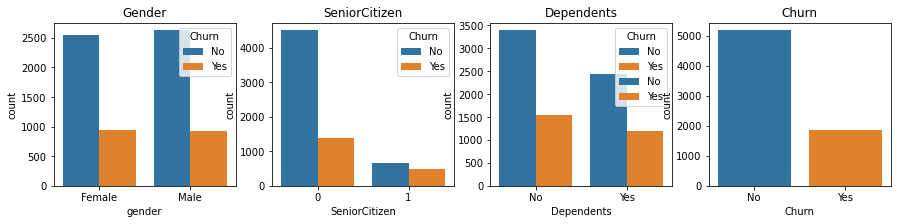

In [27]:
plt.figure(figsize=(15,3))
plt.subplot(1, 4, 1)
plt.title('Gender')
sns.countplot(x='gender',hue='Churn',data=TC_df_clean)

plt.subplot(1,4,2)
plt.title('SeniorCitizen')
sns.countplot(x='SeniorCitizen',hue='Churn',data=TC_df_clean)

plt.subplot(1,4,3)
plt.title('Partner')
sns.countplot(x='Partner',hue='Churn',data=TC_df_clean)

plt.subplot(1,4,3)
plt.title('Dependents')
sns.countplot(x='Dependents',hue='Churn',data=TC_df_clean)

plt.subplot(1,4,4)
plt.title('Churn')
sns.countplot(x=TC_df_clean.Churn)

In [28]:
#There is not significance in male and fremal in the churn rate
#Customers without dependents are more likely to churn
#Senior citizens are 3 times less likely to churn and 0 represent the No and 1 is for Yes.
#Partners are almost 2 times less likely to churn

In [29]:
palette = sns.color_palette("Paired", 7)

def displayCountPlot(cat_list, TC_df, rows=1, columns=3, figsize=(14,2.5), export=False):

  fig, ax = plt.subplots(ncols=columns, figsize=figsize)
  
  idx = 0
  for c in cat_list:
    idx += 1
    plt.subplot(rows, columns, idx)
    ax = sns.countplot(x=TC_df[c], data=TC_df, palette=palette)

    plt.xticks(size=10)
    plt.xlabel('')
    plt.yticks(size=12)
    plt.ylabel('')
    plt.subplots_adjust(hspace = 0.4)
    ax.tick_params(labelleft=False)
    ax.set_title(c, alpha=0.8)

    print_rate(ax, TC_df.shape[0])

    #   if export :
    #     save_img(fig, ax)

    #   plt.tight_layout()
  plt.show()

  #return fig

def print_rate(ax, total):
  for p in ax.patches:
    text = '{:.1f}% ({})'.format(100 * p.get_height() / total, p.get_height())
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height() * 0.5
    ax.annotate(text, (x, y), size = 10, ha="center", va="center")

# def save_img(fig, ax):
#   fig.savefig(ax.get_title(), dpi=600)

In [30]:
#Lets see what the churn for the all the attributes in the list
TC_df_churn = TC_df_clean[TC_df_clean['Churn'] == 'Yes']
TC_df_churn = TC_df_churn.drop('Churn', axis=1)

TC_df_churn.loc[TC_df_churn['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
TC_df_churn.loc[TC_df_churn['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

personal = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                          'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                          'StreamingMovies']
contract = ['Contract', 'PaperlessBilling', 'PaymentMethod']

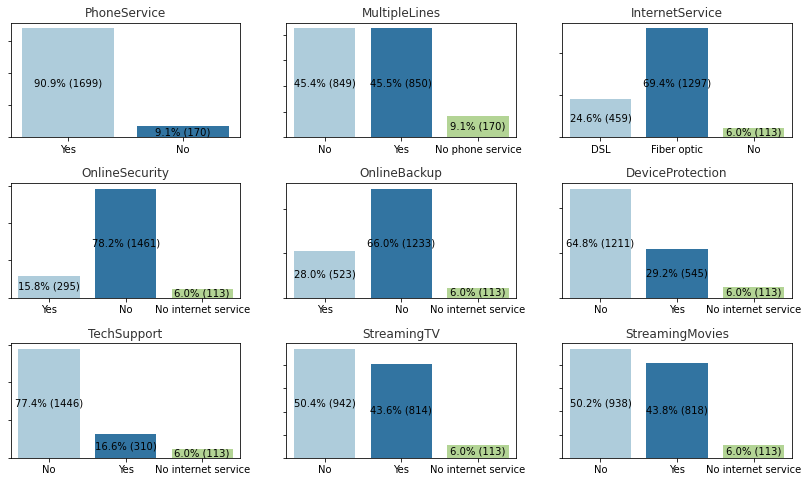

In [31]:
displayCountPlot(services, TC_df_churn, rows=3, columns=3, figsize=(14,8))

In [32]:
#Most of the users to likely to churn has phone Service
#Fiber Optic user are likely to churn than DSL cutomer
#Tech Support has the lowest churn rate in the given attributes
#Customers that do not have Online Security, Device Protection, Online Backup, and Tech Support services enabled are more likely to leave

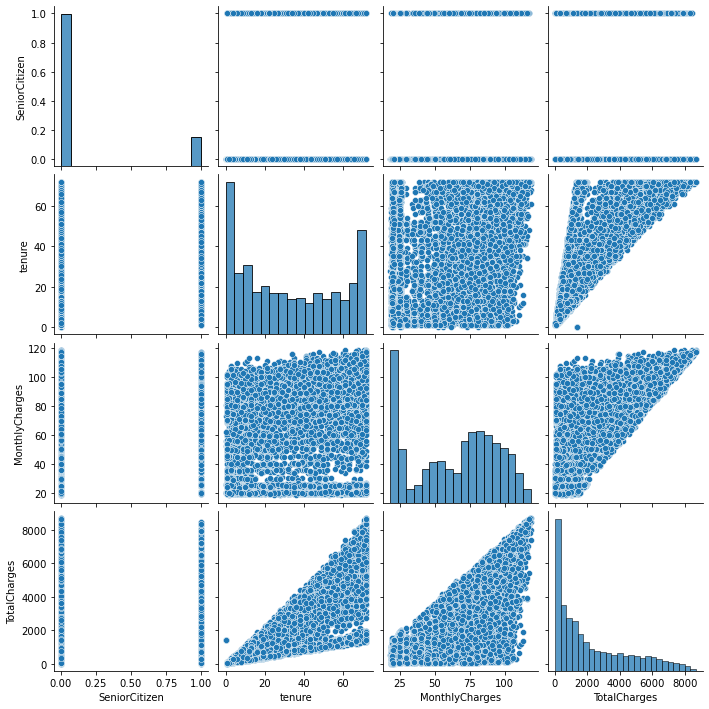

In [33]:
#pair Plot
sns.pairplot(TC_df_clean)

<AxesSubplot:title={'center':'PaymentMethod'}, xlabel='PaymentMethod', ylabel='count'>

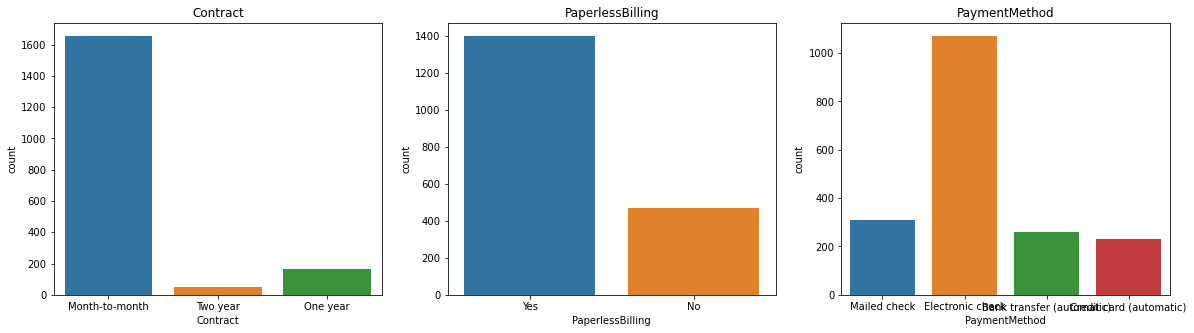

In [34]:
TC_df_churn['PaymentMethod'] = TC_df_churn['PaymentMethod'].str.replace('( (automatic) )', '')
plt.figure(figsize=(20,5))
plt.subplot(1, 3, 1)
plt.title('Contract')
sns.countplot(x='Contract',data=TC_df_churn)

plt.subplot(1,3,2)
plt.title('PaperlessBilling')
sns.countplot(x='PaperlessBilling',data=TC_df_churn)

plt.subplot(1,3,3)
plt.title('PaymentMethod')
sns.countplot(x='PaymentMethod',data=TC_df_churn)


In [35]:
#Month-to-Month in Contract are more likely to churn
#Paperless billing and Electronic Check in Payments Methods are likely to churn high compared to other methods.


# Data pre-processing: 

In [36]:
print("Customer With Churn as YES: ",TC_df_clean[TC_df_clean['Churn'] == 'Yes'].shape[0])
print("Customer With Churn as NO: ",TC_df_clean[TC_df_clean['Churn'] == 'No'].shape[0])


Customer With Churn as YES:  1869
Customer With Churn as NO:  5174


<AxesSubplot:title={'center':'Churn'}, xlabel='Churn', ylabel='count'>

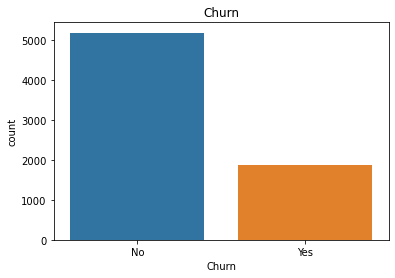

In [37]:
#We can see the there is imbalnce in the data.
plt.title('Churn')
sns.countplot(x=TC_df_clean.Churn)

In [38]:
#Segregate predictors vs target attributes
#Target is churn 
#Predictors are all the column except cutomer id

In [39]:
binary_feat = TC_df_clean.nunique()[TC_df_clean.nunique() == 2].keys().tolist()
numeric_feat = [col for col in TC_df_clean.select_dtypes(['float','int']).columns.tolist() if col not in binary_feat]
categorical_feat = [ col for col in TC_df_clean.select_dtypes('object').columns.tolist() if col not in binary_feat + numeric_feat ]

TC_df_proc = TC_df_clean.copy()

In [40]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
for i in binary_feat:
  TC_df_proc[i] = LabelEncoder().fit_transform(TC_df_proc[i])
  print(i, '\n', np.unique(TC_df_proc['Churn'].values))

gender 
 ['No' 'Yes']
SeniorCitizen 
 ['No' 'Yes']
Partner 
 ['No' 'Yes']
Dependents 
 ['No' 'Yes']
PhoneService 
 ['No' 'Yes']
PaperlessBilling 
 ['No' 'Yes']
Churn 
 [0 1]


In [41]:
#converting the categorical values to dummy variables.
print(categorical_feat)
TC_df_proc = pd.get_dummies(TC_df_proc, columns=categorical_feat)
print(TC_df_proc.columns)

['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',


In [42]:
#processed dataset
#Check if the train and test data have similar statistical characteristics when compared with original data
#before the train test split
print('Original dataset:')
print('Attributes: ',TC_df.shape[1])
print('Entries: ',TC_df.shape[0])

print('Processed dataset:')
print('Attributes: ',TC_df_proc.shape[1])
print('Entries: ',TC_df_proc.shape[0])
TC_df_proc.head()

Original dataset:
Attributes:  21
Entries:  7043
Processed dataset:
Attributes:  41
Entries:  7043


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


In [43]:
X=TC_df_proc.drop('Churn',axis=1)
y=TC_df_proc['Churn']

In [44]:
#Perform train-test split.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [45]:
print('X_train:')
print('Attributes: ',X_train.shape[1])
print('Entries: ',X_train.shape[0])

print('y_train:')
print('Y Train Shape: ',y_train.shape)


X_train:
Attributes:  40
Entries:  5282
y_train:
Y Train Shape:  (5282,)


C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rahul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Test Data Churn'}, xlabel='Churn', ylabel='count'>

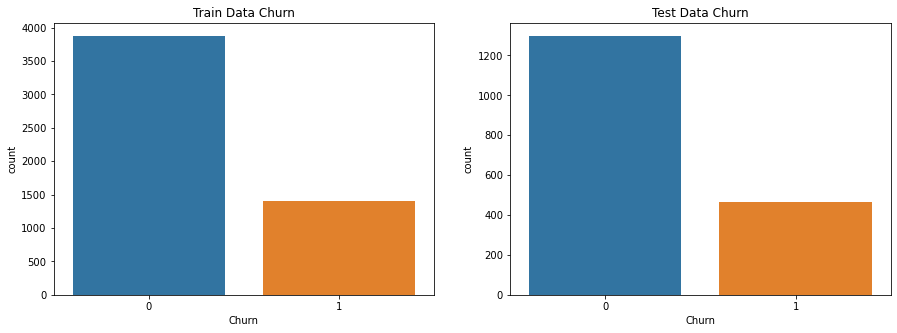

In [46]:
# We can see train and Test data of churn has similar data .
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title('Train Data Churn')
sns.countplot(y_train)

plt.subplot(1, 2, 2)
plt.title('Test Data Churn')
sns.countplot(y_test)

# Model training, testing and tuning

In [47]:
#Balancing the data

# under sampling
# from imblearn import under_sampling, RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample (X_train, y_train)

In [48]:
print('Before balancing:')
print('Attributes: ',X_train.shape[1])
print('Entries: ',X_train.shape[0])
print('After balancing:')
print('Attributes: ',X_train_rus.shape[1])
print('Entries: ',X_train_rus.shape[0])
# make sure the number of classes are equal distibuted
np.unique(y_train_rus, return_counts=True)

Before balancing:
Attributes:  40
Entries:  5282
After balancing:
Attributes:  40
Entries:  2812


(array([0, 1]), array([1406, 1406], dtype=int64))

In [49]:
# standardizing X_train and X_test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train_rus = scaler.fit_transform(X_train_rus)
X_test = scaler.transform(X_test)

In [50]:
#Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion = 'gini', random_state=1)

dt.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(random_state=1)

In [51]:
print("DecisionTreeClassifier- Train",dt.score(X_train_rus, y_train_rus))
print("DecisionTreeClassifier- Test",dt.score(X_test, y_test))

DecisionTreeClassifier- Train 0.9989331436699858
DecisionTreeClassifier- Test 0.6831345826235093


In [52]:
#reducing the maximum depth for better accuracy.
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1)
dTreeR.fit(X_train_rus, y_train_rus)
print("DecisionTreeClassifier- Train",dTreeR.score(X_train_rus, y_train_rus))
print("DecisionTreeClassifier- Test",dTreeR.score(X_test, y_test))

DecisionTreeClassifier- Train 0.7443100995732574
DecisionTreeClassifier- Test 0.7296990346394094


In [53]:
#Ensemble Learning - Bagging
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dt, n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train_rus, y_train_rus)

y_predict = bgcl.predict(X_test)

print("Bagging - Train:",bgcl.score(X_train_rus , y_train_rus))
print("Bagging - Test:",bgcl.score(X_test , y_test))


Bagging - Train: 0.9989331436699858
Bagging - Test: 0.7336740488358887


In [54]:
# Ensemble Learning - AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(X_train_rus, y_train_rus)
y_predict = abcl.predict(X_test)

print("AdaBoosting - Train:",abcl.score(X_train_rus , y_train_rus))
print("AdaBoosting - Test :",abcl.score(X_test , y_test))

AdaBoosting - Train: 0.7581792318634424
AdaBoosting - Test : 0.7512776831345827


In [55]:
#Ensemble Learning - GradientBoost
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train_rus, y_train_rus)
y_predict = gbcl.predict(X_test)

print("GradientBoost - Train:",gbcl.score(X_train_rus, y_train_rus))
print("GradientBoost - Test:",gbcl.score(X_test, y_test))

GradientBoost - Train: 0.7955192034139402
GradientBoost - Test: 0.7524134014764339


In [56]:
#Ensemble RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train_rus, y_train_rus)
y_predict = rfcl.predict(X_test)

print("RandomForestClassifier - Train:",rfcl.score(X_train_rus, y_train_rus))
print("RandomForestClassifier - Test:",rfcl.score(X_test, y_test))

RandomForestClassifier - Train: 0.9989331436699858
RandomForestClassifier - Test: 0.7399204997160704


In [57]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_rus, y_train_rus)
y_predict=lr.predict(X_test)

print("LogisticRegression - Train:",lr.score(X_train_rus, y_train_rus))
print("LogisticRegression - Test:",lr.score(X_test, y_test))

LogisticRegression - Train: 0.7624466571834992
LogisticRegression - Test: 0.7569562748438388


In [58]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_rus, y_train_rus)
y_predict=lr.predict(X_test)
print("SVC - Train:",lr.score(X_train_rus, y_train_rus))
print("SVC - Test:",lr.score(X_test, y_test))

SVC - Train: 0.7624466571834992
SVC - Test: 0.7569562748438388


In [59]:
#As LogisticRegression and SVC performed better. Let's tune hyperparameters and check if it can deliver even better results.

In [60]:
# Logistic Regression
# I will be tunning solver and C in the Logistic Regression model.
# As can be seen below it presented a slight improvement after tuned

In [61]:

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

kfold = StratifiedKFold(n_splits=5, shuffle=True)

lr = LogisticRegression()

param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
              'C': [0.001, 0.01, 1, 10, 100]}

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.8057999545695465 for {'C': 0.001, 'solver': 'liblinear'}


In [62]:
from sklearn.metrics import classification_report  
from sklearn.metrics import confusion_matrix  


model_lr = LogisticRegression(solver='newton-cg', C=0.001)
model_lr.fit(X_train_rus, y_train_rus)
y_pred_lr = model_lr.predict(X_test)
lr_corr = confusion_matrix(y_test, y_pred_lr, normalize='true')
print("\tClassification Report for Logistic Regression")
print(classification_report(y_test, y_pred_lr))

	Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.92      0.72      0.80      1298
           1       0.51      0.81      0.62       463

    accuracy                           0.74      1761
   macro avg       0.71      0.76      0.71      1761
weighted avg       0.81      0.74      0.76      1761



In [63]:
param_grid = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.001, 0.01, 1, 10, 100] }

search = GridSearchCV(SVC(), param_grid, scoring='recall', cv=kfold)
result = search.fit(X_train_rus, y_train_rus)

print(f'Best recall: {result.best_score_} for {result.best_params_}')

Best recall: 0.9345776229777139 for {'C': 0.01, 'kernel': 'poly'}


In [64]:
model_svm = SVC(kernel='poly', C=0.01)
model_svm.fit(X_train_rus, y_train_rus)
y_pred_svm = model_svm.predict(X_test)
svm_corr = confusion_matrix(y_test, y_pred_svm, normalize='true')

print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.94      0.38      0.54      1298
           1       0.35      0.93      0.51       463

    accuracy                           0.52      1761
   macro avg       0.64      0.65      0.52      1761
weighted avg       0.78      0.52      0.53      1761



No algorithm will predict churn with 100% accuracy. 
There will always be a trade-off between precision and recall. 
That's why it's important to test and understand the strengths 
and weaknesses of each classifier and get the best out of each.

If the goal is to engage and reach out to the customers to prevent them from churning,
it's acceptable to engage with those who are mistakenly tagged as 'not churned,'
as it does not cause any negative problem. It could potentially make them even happier with the service. 
This is the kind of model that can add value from day one if proper action is taken out of it.

Data quality can be improved by giving more detail about the telecom services available. The competion in the market and market leader services.
Customer data can be improved by adding more personal details usage details.9 eg service they like the most)
Giving offers based on the intrested will reduce the chrun rate. Need the offer details for the better prediction 


In [65]:
# Using Logistic Regresion for the GUI Model devleopment because Logistic Regestion perform slight better than SVC model
#and other Ensemble Models.